Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


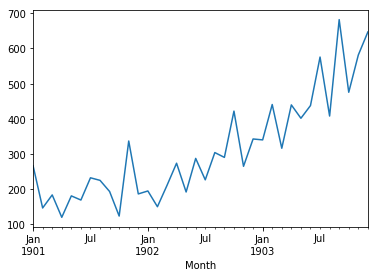

In [22]:
#This code is based on the blog https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
# load and plot dataset
from pandas import read_csv
from pandas import DataFrame
from pandas import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

In [12]:
X = series.values
train, test = X[0:-12], X[-12:]
#Debug Statements below
# print(X)
print(train)
print(test)

[ 266.   145.9  183.1  119.3  180.3  168.5  231.8  224.5  192.8  122.9
  336.5  185.9  194.3  149.5  210.1  273.3  191.4  287.   226.   303.6
  289.9  421.6  264.5  342.3]
[ 339.7  440.4  315.9  439.3  401.3  437.4  575.5  407.6  682.   475.3
  581.3  646.9]


RMSE: 136.761


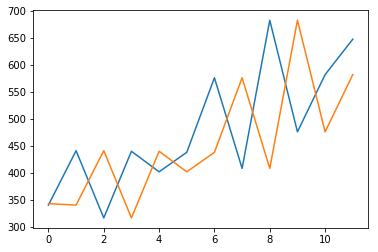

In [13]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
    predictions.append(history[-1])
	# observation
    history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [47]:
# frame a sequence as a supervised learning problem
from pandas import concat
from pandas import DataFrame

def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
#     print(columns)
    columns.append(df)
#     print(columns)
    df = concat(columns, axis=1)
    print(df.head(5))
    df.fillna(0, inplace=True)
    return df

In [48]:
supervised = timeseries_to_supervised(X, 1)

       0      0
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [49]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)